In [32]:
library(pracma)

## 1. The basic model

In [60]:
leukemia_abundance <- function(t,x,params){
    dy <- rep(0,4)
    ry <- params[1]
    u <- params[2]
    d0 <- params[3]
    ay <- params[4]
    d1 <- params[5]
    by <- params[6]
    d2 <- params[7]
    cy <- params[8]
    d3 <- params[9]
    
    dy[1] <- (ry*((1-u)-d0)*x[1])
    dy[2] <- ay*x[1]-d1*x[2]
    dy[3] <- by*x[2]-d2*x[3]
    dy[4] <- cy*x[3]-d3*x[4]
  return(dy)
}

In [61]:
d0 <- 0.003
d1 <- 0.008
d2 <- 0.05
d3 <- 1

ry <- 0.008
ay <- 1.6/100
by <- 10/750
cy <- 100
u <- 4e-8

In [66]:
params <- c(ry, u, d0, ay, d1, by, d2, cy, d3)
start_val_params <- c(ry, u, d0, 1.6, d1, 10, d2, cy, d3)

## 2. The $y_0, y_1, y_2, y_3$ are computed at the seady state.

In [63]:
get_start_values <- function(x0, params){
    y <- rep(0,4)
    ry <- params[1]
    u <- params[2]
    d0 <- params[3]
    ay <- params[4]
    d1 <- params[5]
    by <- params[6]
    d2 <- params[7]
    cy <- params[8]
    d3 <- params[9]
    
    y[1] <- x0
    y[2] <- (ay*y[1])/d1
    y[3] <- (by*y[2])/d2
    y[4] <- (cy*y[3])/d3
  return(y)
}

[1] 2.5e+05 5.0e+07 1.0e+10 1.0e+12

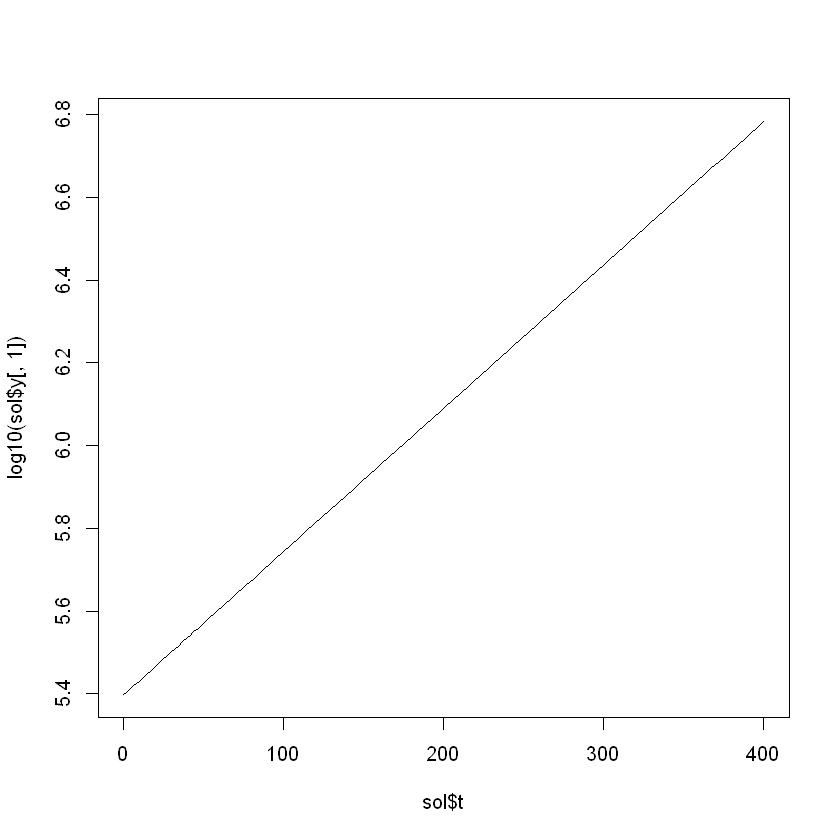

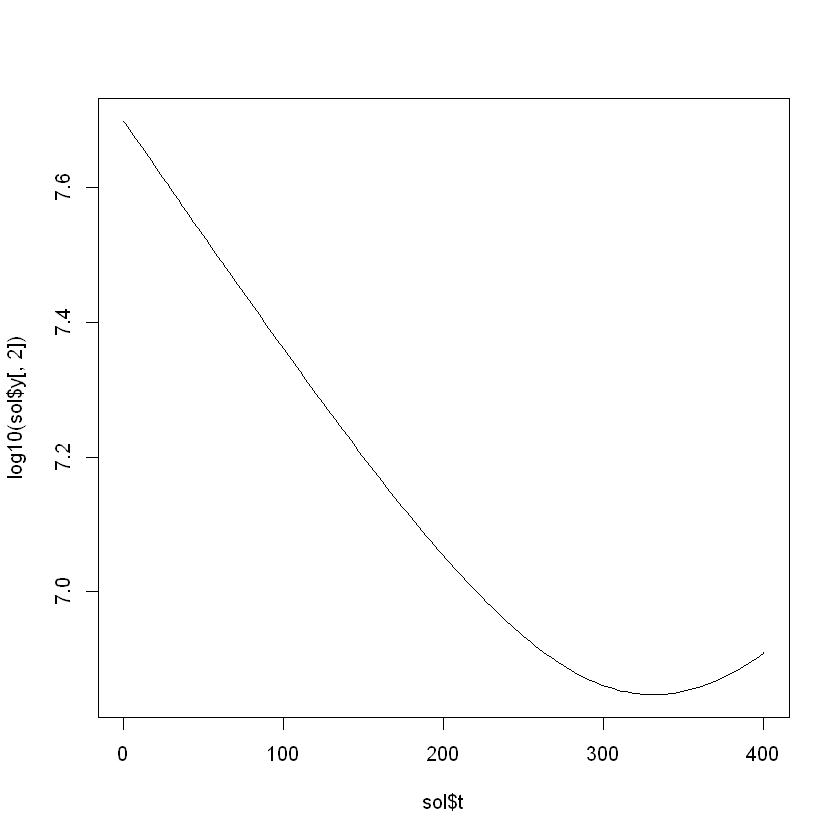

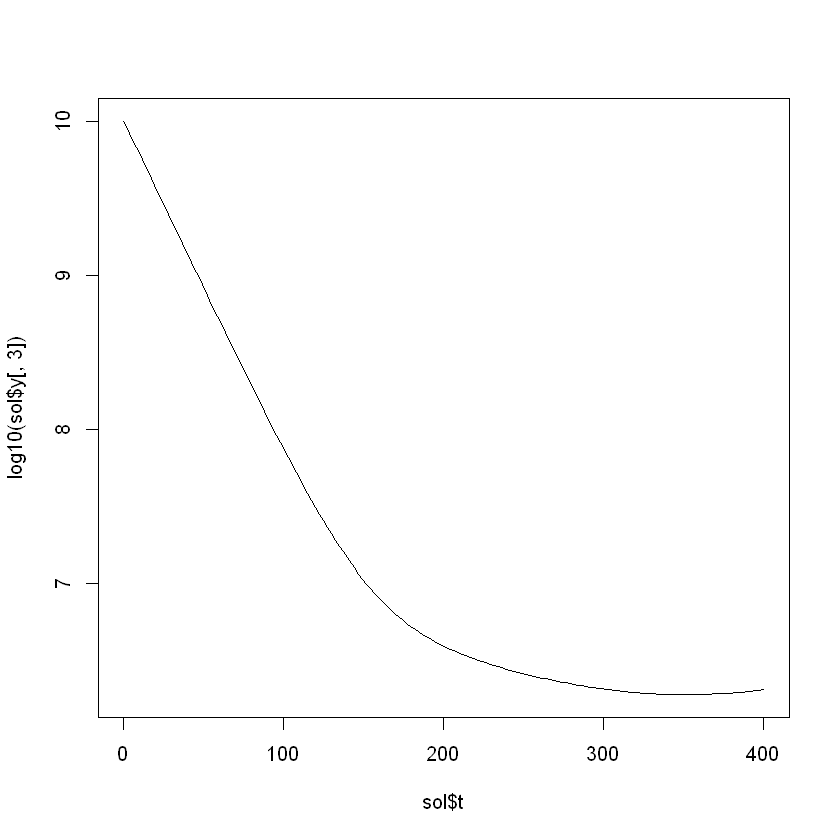

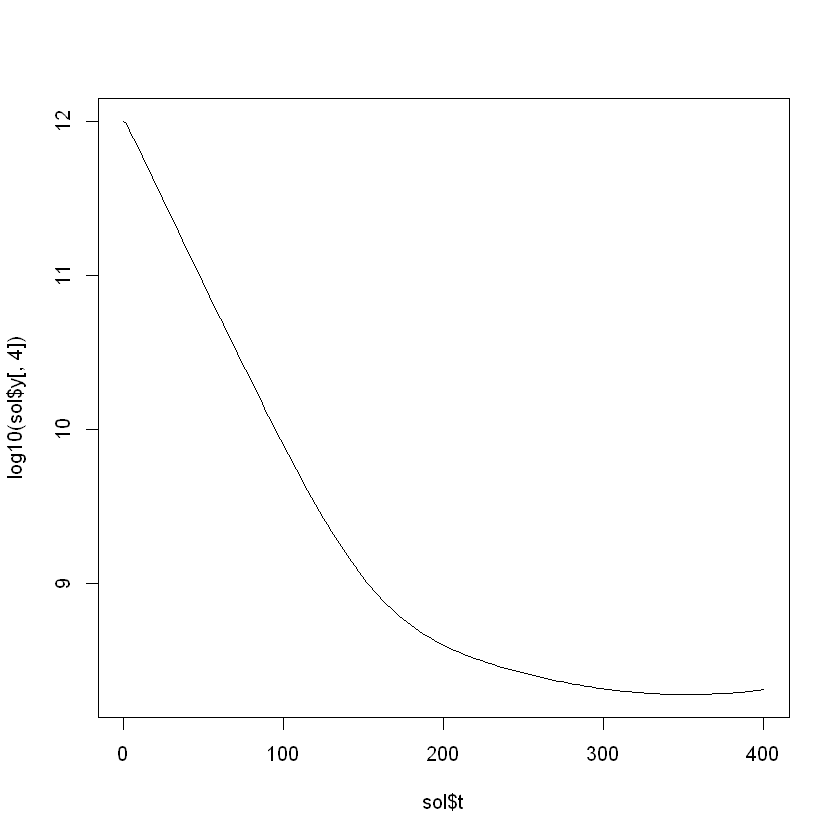

In [67]:
start_val <- get_start_values(2.5e5, start_val_params)
start_val
sol <- ode23(leukemia_abundance, 0, 400, start_val,params = params)
plot(sol$t, log10(sol$y[,1]),type='l')
plot(sol$t, log10(sol$y[,2]),type='l')
plot(sol$t, log10(sol$y[,3]),type='l')
plot(sol$t, log10(sol$y[,4]),type='l')

Previous plots should like the following plots.

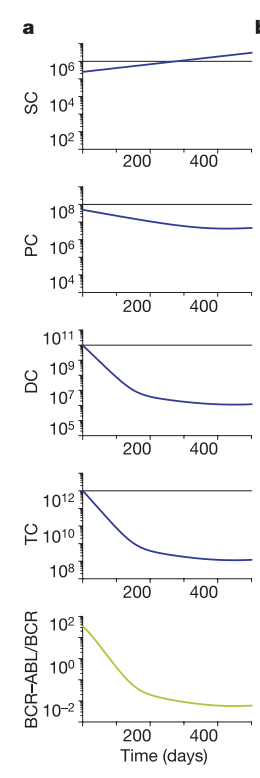

They do not look like that. Problem at steady state/initial state computation?

## 3. The $y_0$ is doubled.

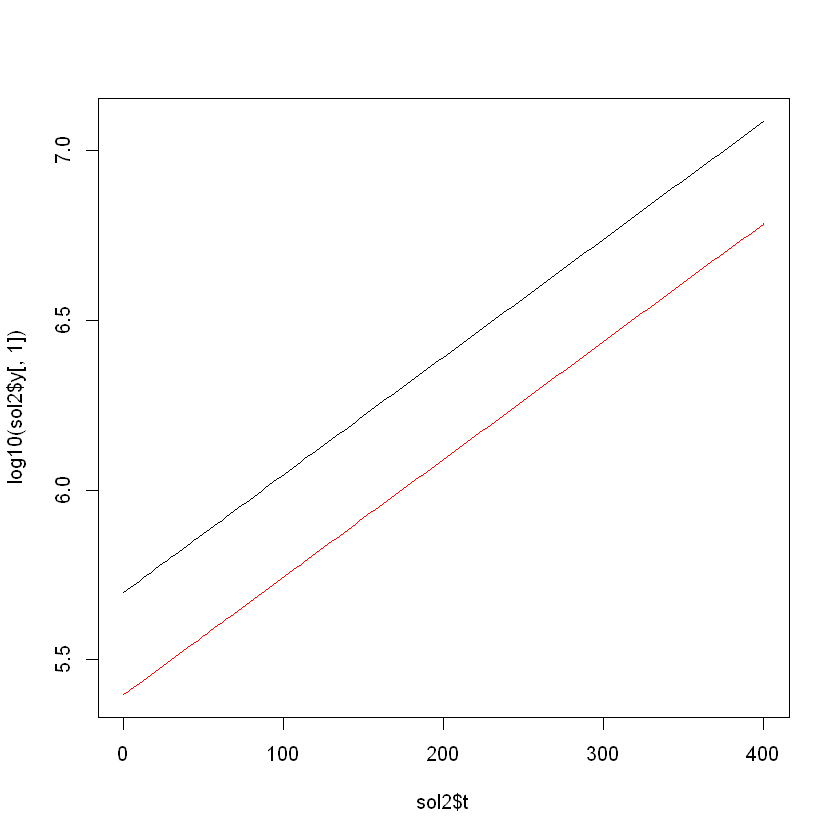

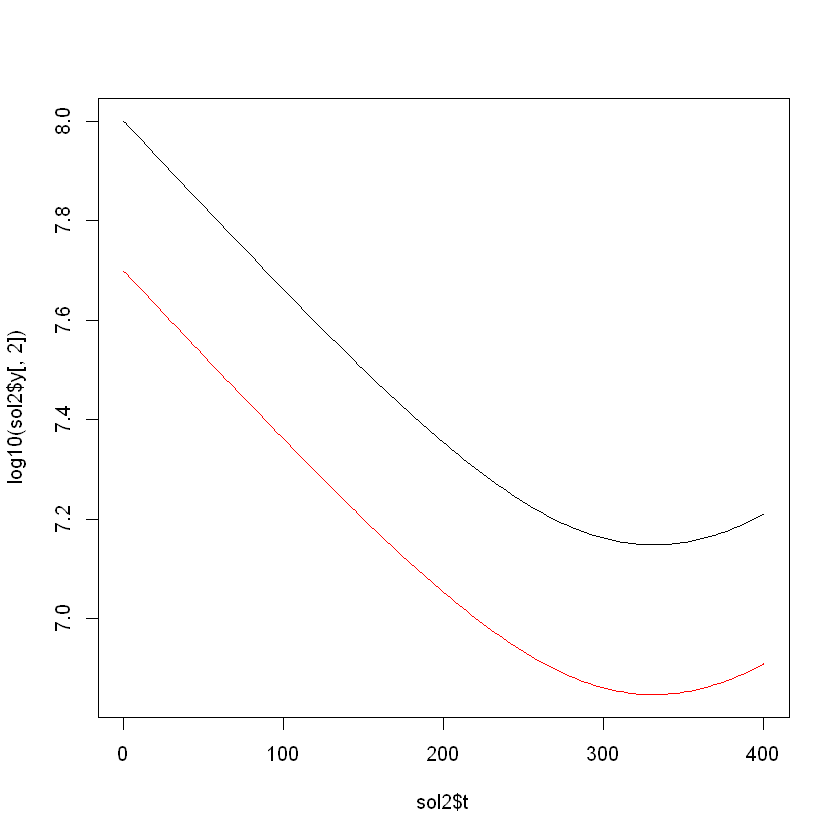

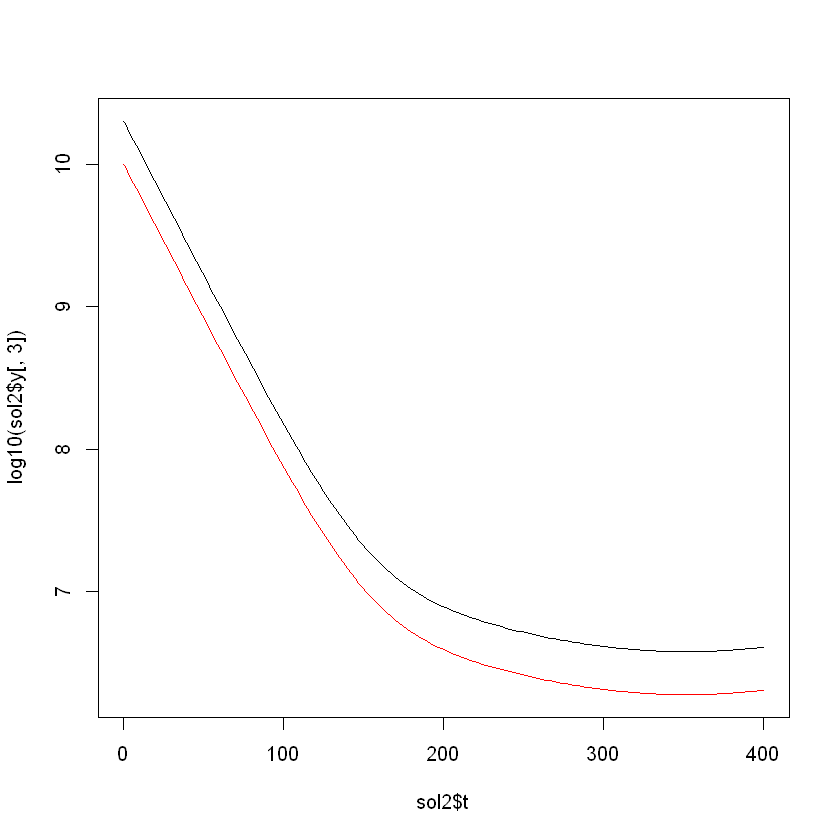

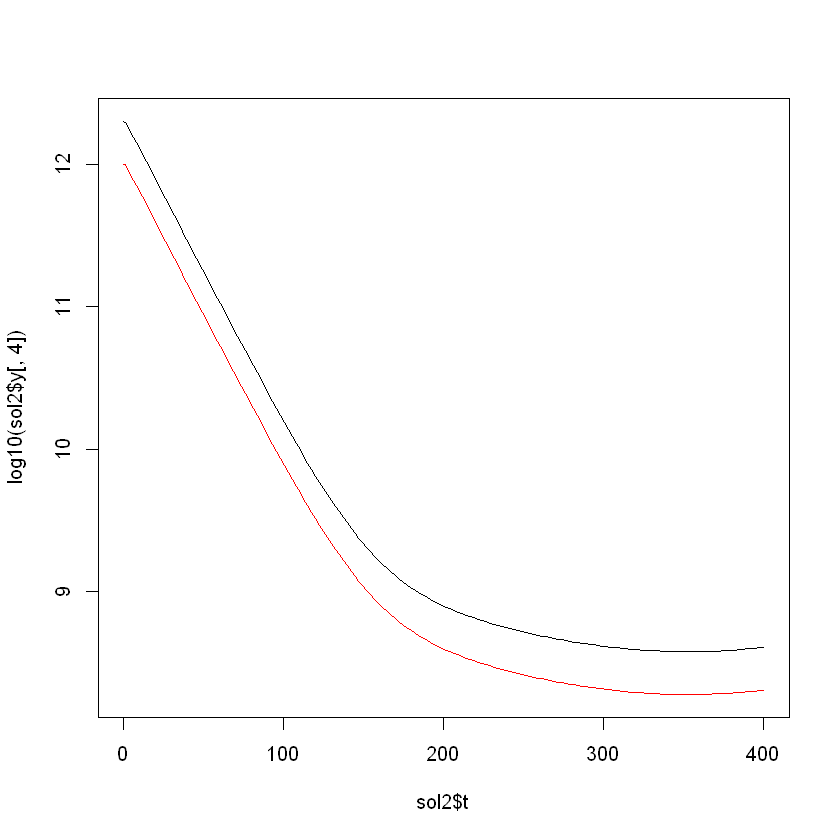

In [68]:
start_val2 <- get_start_values(2.5e5*2, start_val_params)
sol2 <- ode23(leukemia_abundance, 0, 400, start_val2,params = params)
plot(sol2$t, log10(sol2$y[,1]),type='l', ylim=c(min(log10(sol$y[,1])), max(log10(sol2$y[,1]))))
lines(sol$t, log10(sol$y[,1]),type='l',col='red')

plot(sol2$t, log10(sol2$y[,2]),type='l', ylim=c(min(log10(sol$y[,2])), max(log10(sol2$y[,2]))))
lines(sol$t, log10(sol$y[,2]),type='l',col='red')

plot(sol2$t, log10(sol2$y[,3]),type='l', ylim=c(min(log10(sol$y[,3])), max(log10(sol2$y[,3]))))
lines(sol$t, log10(sol$y[,3]),type='l',col='red')

plot(sol2$t, log10(sol2$y[,4]),type='l', ylim=c(min(log10(sol$y[,4])), max(log10(sol2$y[,4]))))
lines(sol$t, log10(sol$y[,4]),type='l',col='red')

## 4. 5 year simulation

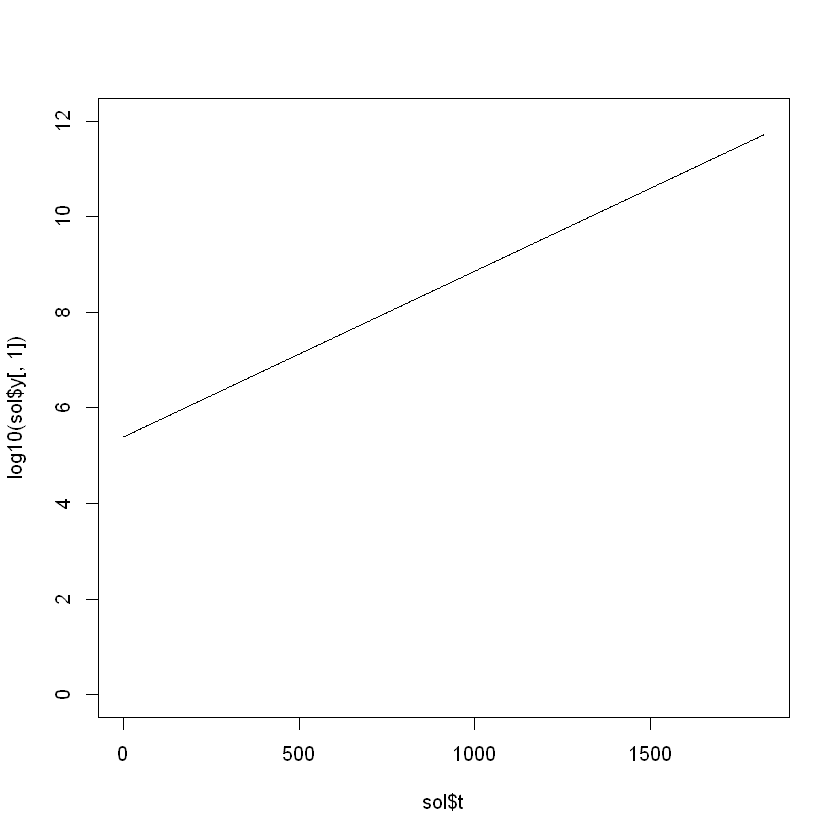

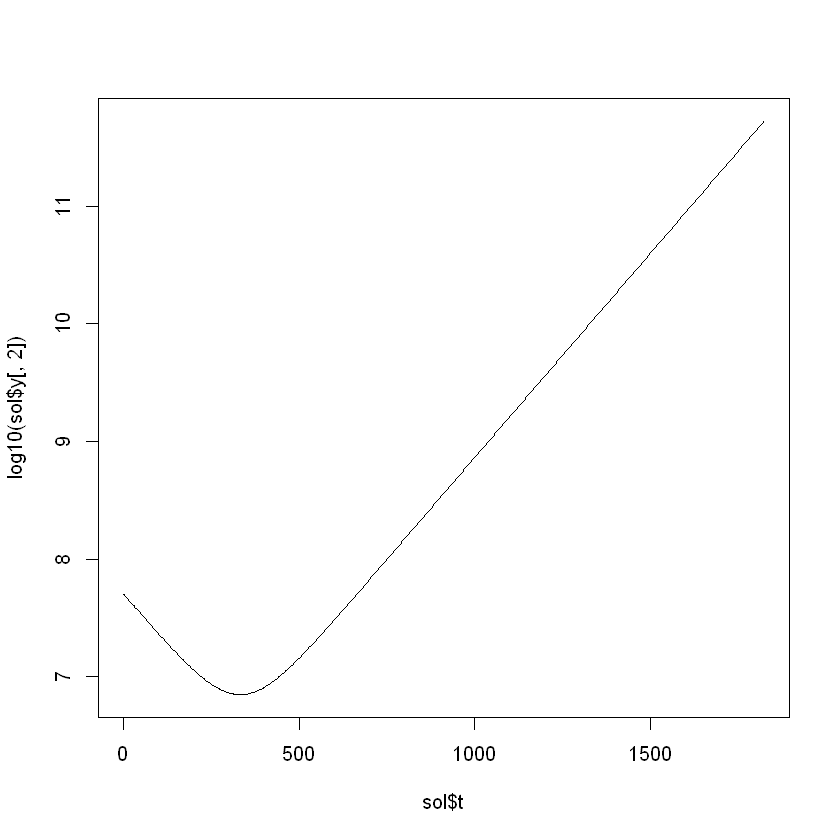

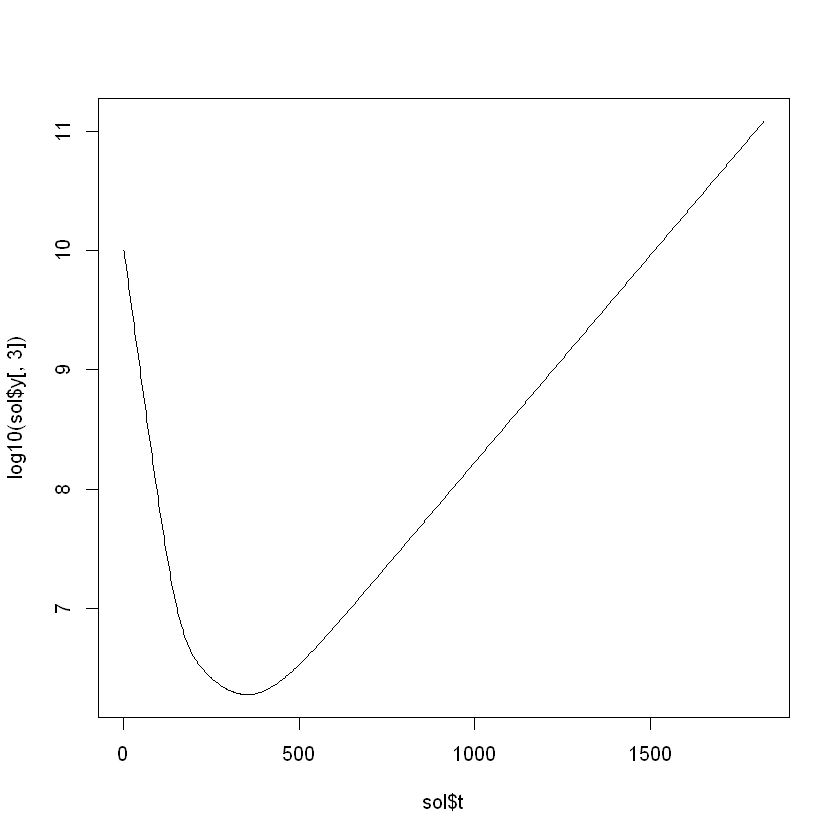

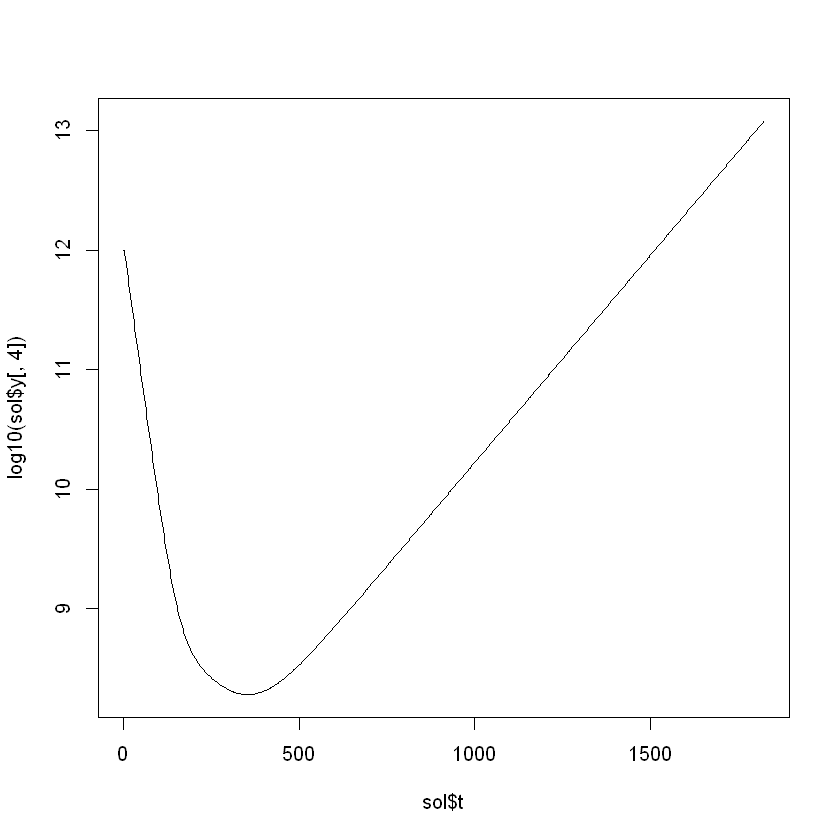

In [69]:
start_val <- get_start_values(2.5e5, c(ry, u, d0, 1.6, d1, 10, d2, cy, d3))
sol <- ode23(leukemia_abundance, 0, 365*5, start_val,params = params)
plot(sol$t, log10(sol$y[,1]),type='l', ylim=c(0,12))
plot(sol$t, log10(sol$y[,2]),type='l')
plot(sol$t, log10(sol$y[,3]),type='l')
plot(sol$t, log10(sol$y[,4]),type='l')

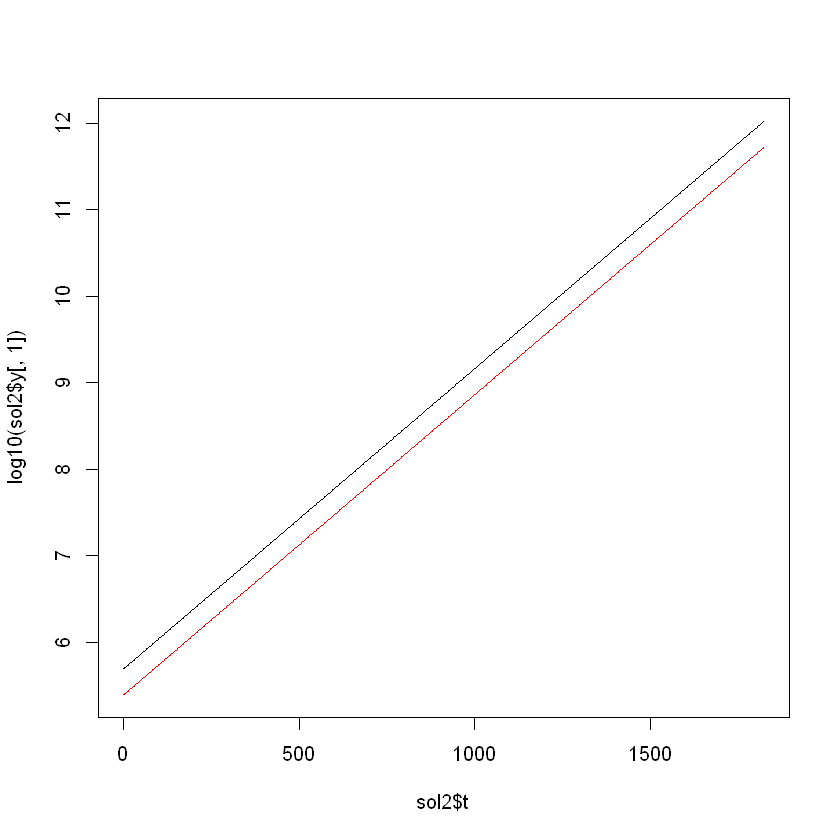

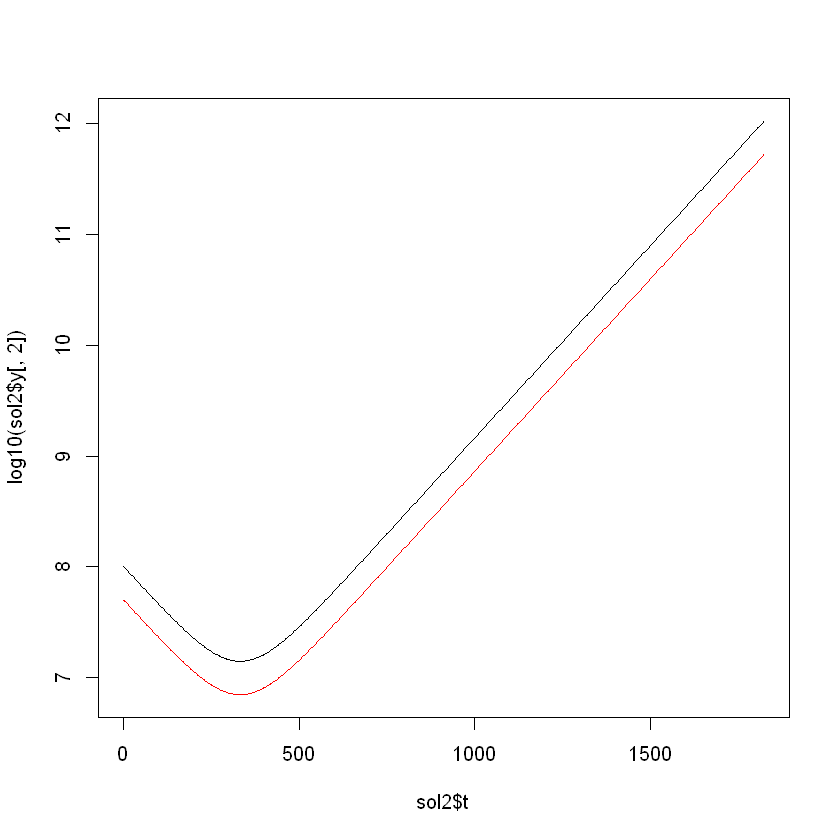

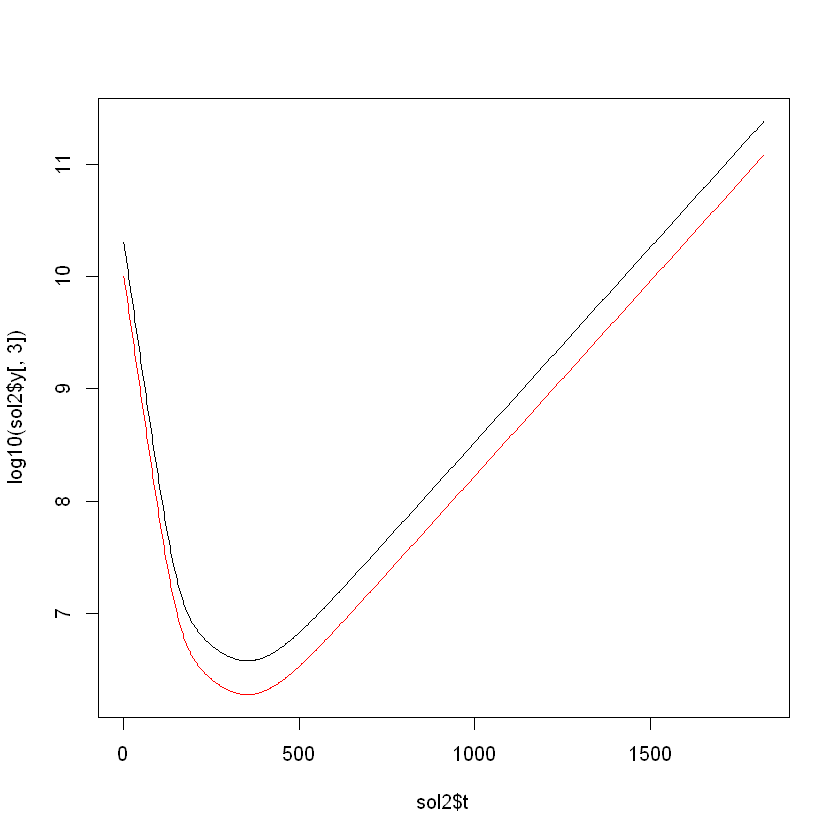

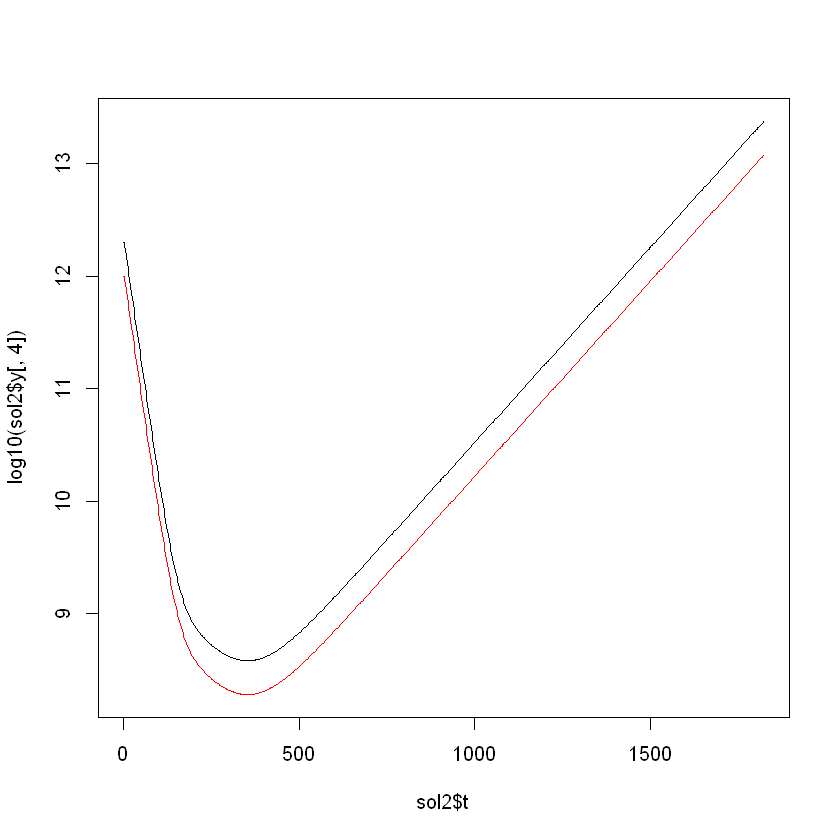

In [70]:
start_val2 <- get_start_values(2.5e5*2, c(ry, u, d0, 1.6, d1, 10, d2, cy, d3))
sol2 <- ode23(leukemia_abundance, 0, 365*5, start_val2,params = params)
plot(sol2$t, log10(sol2$y[,1]),type='l', ylim=c(min(log10(sol$y[,1])), max(log10(sol2$y[,1]))))
lines(sol$t, log10(sol$y[,1]),type='l',col='red')

plot(sol2$t, log10(sol2$y[,2]),type='l', ylim=c(min(log10(sol$y[,2])), max(log10(sol2$y[,2]))))
lines(sol$t, log10(sol$y[,2]),type='l',col='red')

plot(sol2$t, log10(sol2$y[,3]),type='l', ylim=c(min(log10(sol$y[,3])), max(log10(sol2$y[,3]))))
lines(sol$t, log10(sol$y[,3]),type='l',col='red')

plot(sol2$t, log10(sol2$y[,4]),type='l', ylim=c(min(log10(sol$y[,4])), max(log10(sol2$y[,4]))))
lines(sol$t, log10(sol$y[,4]),type='l',col='red')

## 5. Apply resistant leukemic cells to basic model

In [71]:
modified_leukemia_abundance <- function(t,x,params){
  #L0,L1,k12,k21,ke,k2,k1,central,peripheral){
    dy <- rep(0,8)
    ry <- params[1]
    u <- params[2]
    d0 <- params[3]
    ay <- params[4]
    d1 <- params[5]
    by <- params[6]
    d2 <- params[7]
    cy <- params[8]
    d3 <- params[9]
    
    rz <- params[10]
    az <- params[11]
    bz <- params[12]
    cz <- params[13]
    
    dy[1] <- (ry*((1-u)-d0)*x[1])
    dy[2] <- ay*x[1]-d1*x[2]
    dy[3] <- by*x[2]-d2*x[3]
    dy[4] <- cy*x[3]-d3*x[4]
    
    #the z variables
    dy[5] <-  (rz-d0)*x[5]+ry*x[1]*u #z0
    dy[6] <- az*x[5] - d1*x[6] #z1
    dy[7] <- bz*x[6] - d2*x[7] #z2
    dy[8] <- cz*x[7] - d3*x[8] #z3
    return(dy)
}

In [72]:
rz <- 0.023
az <- 1.6
bz <- 10
cz <- 100
mod_params <- c(params, rz, az, bz, cz)

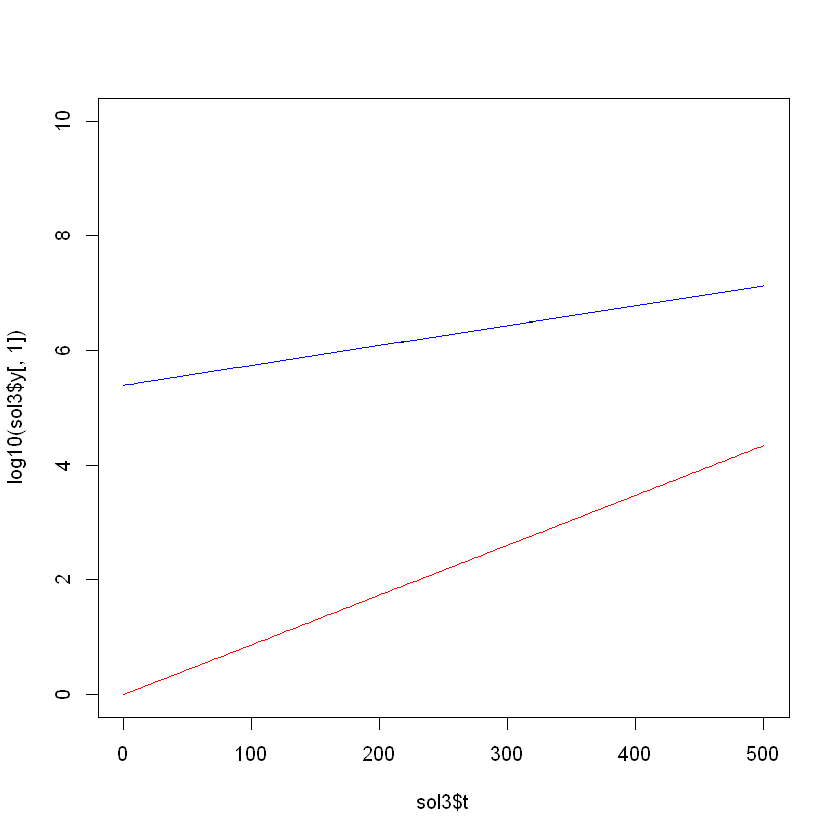

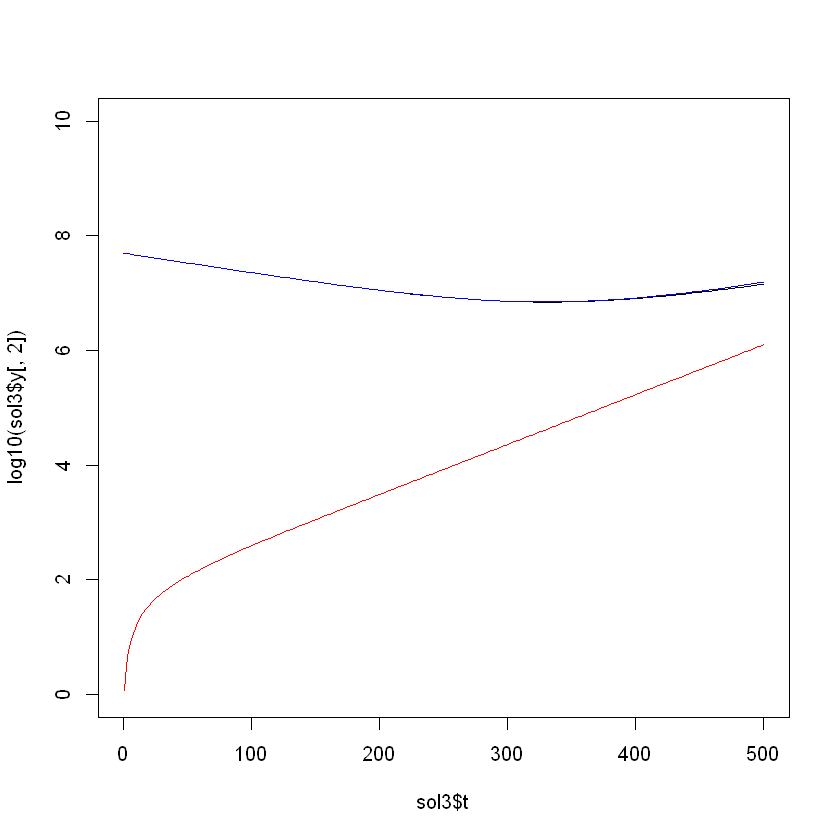

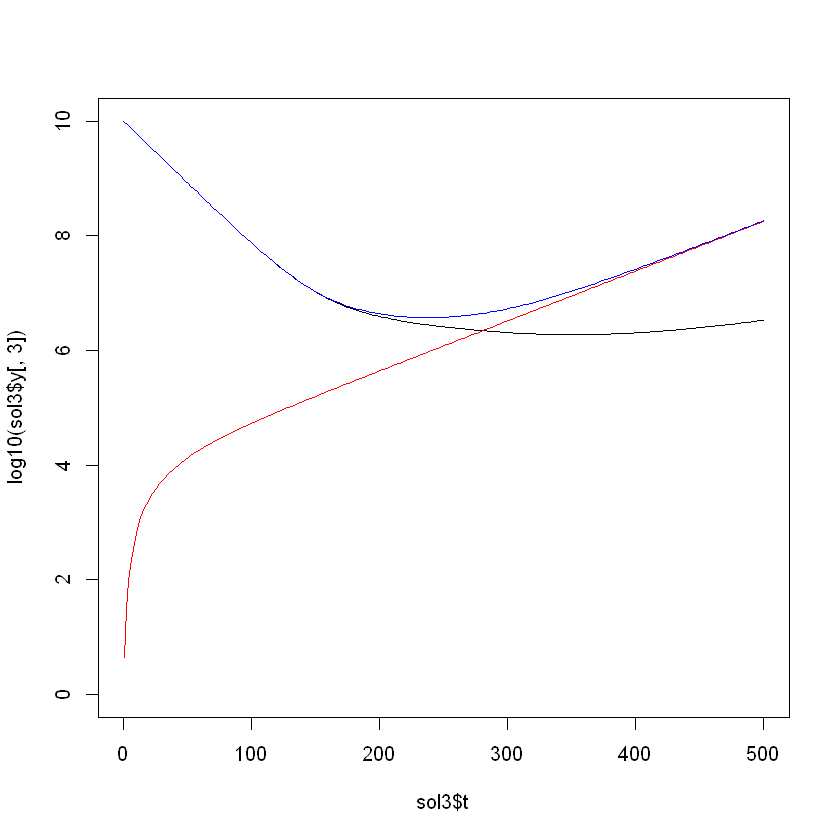

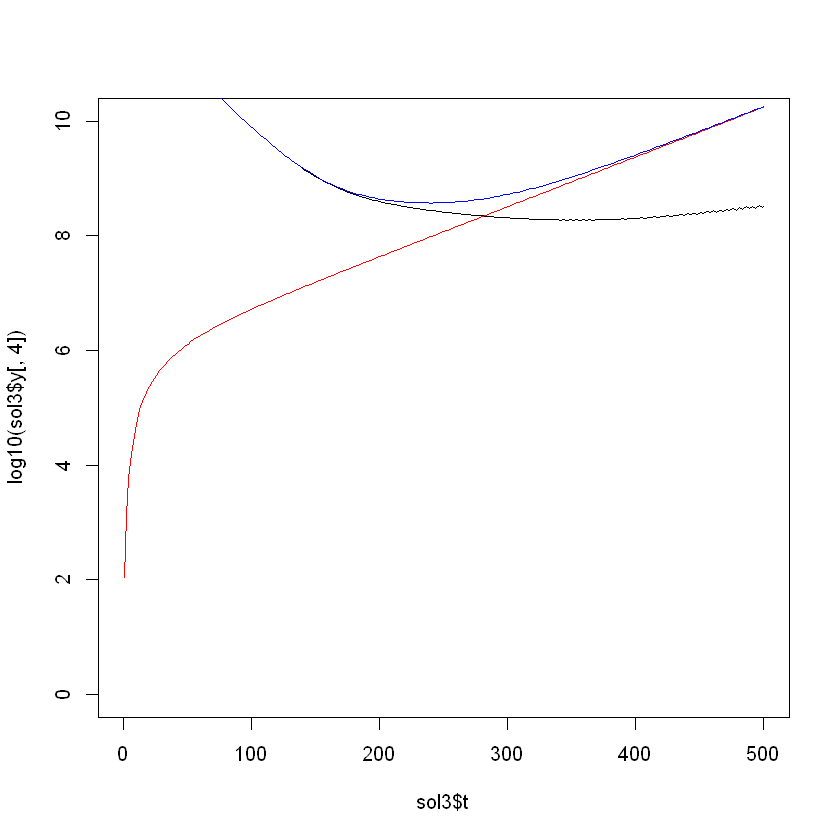

In [73]:
sol3 <- ode23(modified_leukemia_abundance, 0, 500, c(start_val,1,0,0,0), params = mod_params)
plot(sol3$t, log10(sol3$y[,1]),type='l', ylim = c(0,10))
lines(sol3$t, log10(sol3$y[,5]),type='l',col='red')
lines(sol3$t, log10(sol3$y[,1] + sol3$y[,5]),type='l',col='blue')

plot(sol3$t, log10(sol3$y[,2]),type='l', ylim = c(0,10))
lines(sol3$t, log10(sol3$y[,6]),type='l',col='red')
lines(sol3$t, log10(sol3$y[,2] + sol3$y[,6]),type='l',col='blue')

plot(sol3$t, log10(sol3$y[,3]),type='l', ylim = c(0,10))
lines(sol3$t, log10(sol3$y[,7]),type='l',col='red')
lines(sol3$t, log10(sol3$y[,3] + sol3$y[,7]),type='l',col='blue')

plot(sol3$t, log10(sol3$y[,4]),type='l', ylim = c(0,10))
lines(sol3$t, log10(sol3$y[,8]),type='l',col='red')
lines(sol3$t, log10(sol3$y[,4] + sol3$y[,8]),type='l',col='blue')
